# Sentiment Analysis on Specific Topics

Sentiment analysis per topic.
Automated and step-by step version.

In [2]:
# dependencies - install first time using this notebook
# !pip3 install vaderSentiment
# !pip3 install --upgrade pip
# !pip3 install xlrd
# !pip3 install openpyxl

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


# Sentiment Automation

Run the below block if you want everything to be done automatically all at once.
It will output the graphs into `dataout/sentiment/*`

If you want a step-by-step understanding, then see the code below this block.

In [199]:
def df_setup():
    # read in data produced by topic_modelling.ipynb
    df = pd.read_csv('datain/sentiment/grouped-by-topic_with_date.csv')
    df = df[['Unnamed: 0', 'created_at', 'maxtopic', 'corpus', "cleaned_tweet"]].copy()
    df = df.rename({'Unnamed: 0': 'tweet_index'}, axis=1)
    
    # remove any null created_at values from dataframe
    df = df.drop(df[df['created_at'].isnull()].index)
    # ensure that all values in created_at has 2021 (and not random strings)
    df = df[df['created_at'].str.contains("2021")]
    
    # split created_at into date and time columns
    #https://intellipaat.com/community/13909/python-how-can-i-split-a-column-with-both-date-and-time-e-g-2019-07-02-00-12-32-utc-into-two-separate-columns
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['date'] = df['created_at'].dt.date
    df['time'] = df['created_at'].dt.time
    
    return df
    
def sentiment_analysis_per_topic(df, topic):
    # filter df to only have data for the given topic
    df = df[df["maxtopic"] == topic]
    
    # get polarity scores per tweet
    analyzer = SentimentIntensityAnalyzer()
    for tweet in df["corpus"]:
        vs = analyzer.polarity_scores(tweet)
        
    #https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
    pol = lambda x: analyzer.polarity_scores(x)
    df['Polarity'] = df['corpus'].apply(pol)
    
    df = pd.concat([df.drop(['Polarity'], axis=1), df['Polarity'].apply(pd.Series)], axis=1)
    # plot first sentiment
    plot_sentiment(df, topic)
    
    # plot 2nd sentiment
    round_pol = lambda x: calc_pol(x, 0.05)
    df['Polarity'] = df['compound'].apply(round_pol)
    plot_sentiment2(df, topic)
    
    # plot 3rd sentiment
    sentiments = df.groupby('Polarity').count()
    plot_sentiment3(sentiments, topic)
    
    # group tweets by date
    dates = df.groupby('date').count()
    dates['day'] = ''
    for i in range(0, len(dates.index)):
        dates['day'][i] = dates.index[i].day
    # plot tweet frequency 
    plot_frequency_time(dates, topic)
    
    # get average tweet sentiment for a time period
    sumsentiment = 0
    count = 0
    for i in range(len(df.index)):
        if df['date'].iloc[i] == df['date'].iloc[0]:
            sumsentiment += df['compound'].iloc[i]
            count += 1
    avg = sumsentiment / count
    #calculate average sentiment per day
    #https://stackoverflow.com/questions/67899247/compute-column-average-based-on-conditions-pandas
    df_avg = df.groupby(['date'], as_index=False)['compound'].mean()
    
    #add day from date as separate column
    df_avg['day'] = ''
    for i in range(0, len(df_avg.index)):
        df_avg['day'][i] = df_avg['date'][i].day

    #plot average sentiment over time
    plot_sentiment_average_time(df_avg, topic)


def plot_sentiment(df, topic):
    plt.plot(df.index, df['compound'].sort_values())
    plt.title('Topic {}: Sentiment Analysis using Vader'.format(topic))
    plt.ylabel('Polarity')
    plt.xlabel('Tweets')
    plt.savefig('dataout/sentiment/Topic{}_sentiment1.jpeg'.format(topic))
    plt.close()

def plot_sentiment2(df, topic):
    plt.plot(df.index, df['Polarity'].sort_values())
    plt.title('Topic {}: Sentiment Analysis using Vader'.format(topic))
    plt.ylabel('Polarity')
    plt.xlabel('Tweets')
    plt.savefig('dataout/sentiment/Topic{}_sentiment2.jpeg'.format(topic))
    plt.close()

def plot_sentiment3(sentiments, topic):
    plt.bar(sentiments.index, sentiments["compound"])
    plt.title('Topic {}: Sentiment Polarity Difference'.format(topic))
    plt.xlabel('Polarity')
    plt.ylabel('Count')
    plt.savefig('dataout/sentiment/Topic{}_sentiment3.jpeg'.format(topic))
    plt.close()

def plot_frequency_time(dates, topic):
    #plot tweet frequency over time
    plt.plot(dates['day'], dates['cleaned_tweet'])
    plt.title('Topic {}: Tweet Frequency'.format(topic))
    plt.xlabel('Day of May 2021')
    plt.ylabel('Count of Topic4 Tweets')
    plt.savefig('dataout/sentiment/Topic{}_frequency.jpeg'.format(topic))
    plt.close()

def plot_sentiment_average_time(df_avg, topic):
    plt.plot(df_avg['day'], df_avg['compound'])
    plt.title('Topic {}: Sentiment Over Time'.format(topic))
    plt.ylabel('Average Polarity')
    plt.xlabel('Day of May 2021')
    plt.savefig('dataout/sentiment/Topic{}_sentiment4_time.jpeg'.format(topic))
    plt.close()

def calc_pol(x, bound):
    if x < -0.05:
        return -1
    elif x > 0.05:
        return 1
    else:
        return 0

# run for all topic
df = df_setup()
for topic in range(20):
    sentiment_analysis_per_topic(df, topic)
    
# run for one topic
# sentiment_analysis_per_topic(df, 4)

<ipython-input-199-672b64733271>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity'] = df['corpus'].apply(pol)
<ipython-input-199-672b64733271>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['day'][i] = dates.index[i].day
<ipython-input-199-672b64733271>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avg['day'][i] = df_avg['date'][i].day
<ipython-input

<ipython-input-199-672b64733271>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['day'][i] = dates.index[i].day
<ipython-input-199-672b64733271>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avg['day'][i] = df_avg['date'][i].day
<ipython-input-199-672b64733271>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity'] = df['corpus'].apply(pol)
<ipython-input

<ipython-input-199-672b64733271>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity'] = df['corpus'].apply(pol)
<ipython-input-199-672b64733271>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['day'][i] = dates.index[i].day
<ipython-input-199-672b64733271>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avg['day'][i] = df_avg['date'][i].day
<ipython-input

# Sentiment analysis step by step

This is the above code step by step (you can see the dataframes being outputted step by step, etc)

In [190]:
# read in data produced by topic_modelling.ipynb
df = pd.read_csv('datain/sentiment/grouped-by-topic_with_date.csv')
df = df[['Unnamed: 0', 'created_at', 'maxtopic', 'corpus', "cleaned_tweet"]].copy()
df = df.rename({'Unnamed: 0': 'tweet_index'}, axis=1)
df

,tweet_index,created_at,maxtopic,corpus,cleaned_tweet
0,20961,2021-05-26 06:34:56,0,Our new favorite hash tag is #trapdontshill\n\...,our new favorite hash tag is
1,6759,2021-05-30 06:36:50,0,@dikparkes Watch PUMP #NFT video!🤑\nLets re-se...,watch pump video lets re sell this girl
2,5260,2021-05-30 16:29:15,0,@pranksyNFT @BoredApeYC @MeebitsDAO Hope hand ...,hope hand painted oil painting splash ink art ...
3,16594,2021-05-27 08:42:19,0,You want us to check your #NFTs. Drop them her...,you want us to check your drop them here follo...
4,16601,2021-05-27 08:37:47,0,@paris_museum These are the first 4 pieces min...,these are the first pieces minted in my vast c...
...,...,...,...,...,...
30519,26959,2021-05-25 00:49:49,100,#Crypto #wallet / #domain AND #Instagram page ...,and page with followers in the space marlon br...
30520,10319,2021-05-29 01:20:58,100,#NFT &amp; #Polkadot or #NFTCommunity \nand @P...,or and
30521,16463,2021-05-27 09:34:19,100,What is nft,what is nft
30522,17895,2021-05-26 20:52:52,100,@MattTea5 what's an nft\nᵃᵐ ⁱ ᵈᵒⁱⁿᵍ ⁱᵗ ʳⁱᵍʰᵗ ?...,what s an nft


In [191]:
# remove any null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]
df

,tweet_index,created_at,maxtopic,corpus,cleaned_tweet
0,20961,2021-05-26 06:34:56,0,Our new favorite hash tag is #trapdontshill\n\...,our new favorite hash tag is
1,6759,2021-05-30 06:36:50,0,@dikparkes Watch PUMP #NFT video!🤑\nLets re-se...,watch pump video lets re sell this girl
2,5260,2021-05-30 16:29:15,0,@pranksyNFT @BoredApeYC @MeebitsDAO Hope hand ...,hope hand painted oil painting splash ink art ...
3,16594,2021-05-27 08:42:19,0,You want us to check your #NFTs. Drop them her...,you want us to check your drop them here follo...
4,16601,2021-05-27 08:37:47,0,@paris_museum These are the first 4 pieces min...,these are the first pieces minted in my vast c...
...,...,...,...,...,...
30519,26959,2021-05-25 00:49:49,100,#Crypto #wallet / #domain AND #Instagram page ...,and page with followers in the space marlon br...
30520,10319,2021-05-29 01:20:58,100,#NFT &amp; #Polkadot or #NFTCommunity \nand @P...,or and
30521,16463,2021-05-27 09:34:19,100,What is nft,what is nft
30522,17895,2021-05-26 20:52:52,100,@MattTea5 what's an nft\nᵃᵐ ⁱ ᵈᵒⁱⁿᵍ ⁱᵗ ʳⁱᵍʰᵗ ?...,what s an nft


In [192]:
# split created_at into date and time columns
#https://intellipaat.com/community/13909/python-how-can-i-split-a-column-with-both-date-and-time-e-g-2019-07-02-00-12-32-utc-into-two-separate-columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time
df

,tweet_index,created_at,maxtopic,corpus,cleaned_tweet,date,time
0,20961,2021-05-26 06:34:56,0,Our new favorite hash tag is #trapdontshill\n\...,our new favorite hash tag is,2021-05-26,06:34:56
1,6759,2021-05-30 06:36:50,0,@dikparkes Watch PUMP #NFT video!🤑\nLets re-se...,watch pump video lets re sell this girl,2021-05-30,06:36:50
2,5260,2021-05-30 16:29:15,0,@pranksyNFT @BoredApeYC @MeebitsDAO Hope hand ...,hope hand painted oil painting splash ink art ...,2021-05-30,16:29:15
3,16594,2021-05-27 08:42:19,0,You want us to check your #NFTs. Drop them her...,you want us to check your drop them here follo...,2021-05-27,08:42:19
4,16601,2021-05-27 08:37:47,0,@paris_museum These are the first 4 pieces min...,these are the first pieces minted in my vast c...,2021-05-27,08:37:47
...,...,...,...,...,...,...,...
30519,26959,2021-05-25 00:49:49,100,#Crypto #wallet / #domain AND #Instagram page ...,and page with followers in the space marlon br...,2021-05-25,00:49:49
30520,10319,2021-05-29 01:20:58,100,#NFT &amp; #Polkadot or #NFTCommunity \nand @P...,or and,2021-05-29,01:20:58
30521,16463,2021-05-27 09:34:19,100,What is nft,what is nft,2021-05-27,09:34:19
30522,17895,2021-05-26 20:52:52,100,@MattTea5 what's an nft\nᵃᵐ ⁱ ᵈᵒⁱⁿᵍ ⁱᵗ ʳⁱᵍʰᵗ ?...,what s an nft,2021-05-26,20:52:52


In [127]:
topic = 4

In [128]:
df = df[df["maxtopic"] == topic]
df

,tweet_index,created_at,maxtopic,corpus,cleaned_tweet,date,time
7404,21493,2021-05-26 03:08:21,4,@Smart_NFT_News @hodooicom Such a perfect pick...,such a perfect pick for your marketing gold st...,2021-05-26,03:08:21
7405,11565,2021-05-28 16:27:24,4,“I am participating in @https://twitter.com/nf...,i am participating in twitter com nftgateio ai...,2021-05-28,16:27:24
7406,27952,2021-05-24 17:24:29,4,"@ArtiFi_NFT_ ""Road to Nowhere"" \n\nLoop animat...",road to nowhere loop animation with loop sound...,2021-05-24,17:24:29
7407,21397,2021-05-26 03:49:04,4,I am participating in @nftgateio airdrop\n\n@R...,i am participating in airdrop,2021-05-26,03:49:04
7408,21488,2021-05-26 03:11:09,4,“I am participating in @https://twitter.com/nf...,i am participating in twitter com nftgateio ai...,2021-05-26,03:11:09
...,...,...,...,...,...,...,...
11689,1967,2021-05-31 12:05:29,4,@martinraskovsky @hicetnunc2000 @bernizeck @by...,thank you,2021-05-31,12:05:29
11690,8885,2021-05-29 14:04:12,4,I am participating in @https://twitter.com/nft...,i am participating in twitter com nftgateio ai...,2021-05-29,14:04:12
11691,1865,2021-05-31 12:38:41,4,@savanikalui4466 @Michell50189464 @anchaohanh1...,nice airdrop join airdrop with me,2021-05-31,12:38:41
11692,1847,2021-05-31 12:42:45,4,Follow this project!!\n@Quangnguyen9999 @thanh...,follow this project,2021-05-31,12:42:45


In [129]:
analyzer = SentimentIntensityAnalyzer()
for tweet in df["cleaned_tweet"]:
    vs = analyzer.polarity_scores(tweet)
    print("{:-<65} {}".format(tweet, str(vs)))

such a perfect pick for your marketing gold star promotion is a great partner for your project {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.8316}
i am participating in twitter com nftgateio airdrop and tag friends airdrop with hashtags {'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.4767}
road to nowhere loop animation with loop sound price tez only on link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
i am participating in airdrop------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
i am participating in twitter com nftgateio airdrop-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
lets bring to waves ducks collections why because we need a woman in the ducks collections nah she is also cryptolovers and nft lovers waves {'neg': 0.05, 'neu': 0.827, 'pos': 0.122, 'compound': 0.4588}
i am participating in nftgateio airdrop-------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
i am p

TypeError: 'float' object is not iterable

In [130]:
df["cleaned_tweet"]

7404     such a perfect pick for your marketing gold st...
7405     i am participating in twitter com nftgateio ai...
7406     road to nowhere loop animation with loop sound...
7407                         i am participating in airdrop
7408     i am participating in twitter com nftgateio ai...
                               ...                        
11689                                            thank you
11690    i am participating in twitter com nftgateio ai...
11691                    nice airdrop join airdrop with me
11692                                  follow this project
11693                          incredible project w ra wam
Name: cleaned_tweet, Length: 4290, dtype: object

In [131]:
df["corpus"]

7404     @Smart_NFT_News @hodooicom Such a perfect pick...
7405     “I am participating in @https://twitter.com/nf...
7406     @ArtiFi_NFT_ "Road to Nowhere" \n\nLoop animat...
7407     I am participating in @nftgateio airdrop\n\n@R...
7408     “I am participating in @https://twitter.com/nf...
                               ...                        
11689    @martinraskovsky @hicetnunc2000 @bernizeck @by...
11690    I am participating in @https://twitter.com/nft...
11691    @savanikalui4466 @Michell50189464 @anchaohanh1...
11692    Follow this project!!\n@Quangnguyen9999 @thanh...
11693    @DCryptoQueen @llxxppgg Incredible project \n@...
Name: corpus, Length: 4290, dtype: object

In [133]:
# check whether there are any null values in cleaned_tweet
df[df["cleaned_tweet"].isnull()]

,tweet_index,created_at,maxtopic,corpus,cleaned_tweet,date,time
8240,22072,2021-05-25 22:30:14,4,@Bitboy_Crypto @TribeOneDeFi a unique platform...,NaN,2021-05-25,22:30:14


In [135]:
# remove all NaN values from cleaned_tweet
df = df.drop(df[df["cleaned_tweet"].isnull()].index)
df

,tweet_index,created_at,maxtopic,corpus,cleaned_tweet,date,time
7404,21493,2021-05-26 03:08:21,4,@Smart_NFT_News @hodooicom Such a perfect pick...,such a perfect pick for your marketing gold st...,2021-05-26,03:08:21
7405,11565,2021-05-28 16:27:24,4,“I am participating in @https://twitter.com/nf...,i am participating in twitter com nftgateio ai...,2021-05-28,16:27:24
7406,27952,2021-05-24 17:24:29,4,"@ArtiFi_NFT_ ""Road to Nowhere"" \n\nLoop animat...",road to nowhere loop animation with loop sound...,2021-05-24,17:24:29
7407,21397,2021-05-26 03:49:04,4,I am participating in @nftgateio airdrop\n\n@R...,i am participating in airdrop,2021-05-26,03:49:04
7408,21488,2021-05-26 03:11:09,4,“I am participating in @https://twitter.com/nf...,i am participating in twitter com nftgateio ai...,2021-05-26,03:11:09
...,...,...,...,...,...,...,...
11689,1967,2021-05-31 12:05:29,4,@martinraskovsky @hicetnunc2000 @bernizeck @by...,thank you,2021-05-31,12:05:29
11690,8885,2021-05-29 14:04:12,4,I am participating in @https://twitter.com/nft...,i am participating in twitter com nftgateio ai...,2021-05-29,14:04:12
11691,1865,2021-05-31 12:38:41,4,@savanikalui4466 @Michell50189464 @anchaohanh1...,nice airdrop join airdrop with me,2021-05-31,12:38:41
11692,1847,2021-05-31 12:42:45,4,Follow this project!!\n@Quangnguyen9999 @thanh...,follow this project,2021-05-31,12:42:45


In [136]:
#https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
pol = lambda x: analyzer.polarity_scores(x)
df['Polarity'] = df["cleaned_tweet"].apply(pol)
df

,tweet_index,created_at,maxtopic,corpus,cleaned_tweet,date,time,Polarity
7404,21493,2021-05-26 03:08:21,4,@Smart_NFT_News @hodooicom Such a perfect pick...,such a perfect pick for your marketing gold st...,2021-05-26,03:08:21,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp..."
7405,11565,2021-05-28 16:27:24,4,“I am participating in @https://twitter.com/nf...,i am participating in twitter com nftgateio ai...,2021-05-28,16:27:24,"{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp..."
7406,27952,2021-05-24 17:24:29,4,"@ArtiFi_NFT_ ""Road to Nowhere"" \n\nLoop animat...",road to nowhere loop animation with loop sound...,2021-05-24,17:24:29,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7407,21397,2021-05-26 03:49:04,4,I am participating in @nftgateio airdrop\n\n@R...,i am participating in airdrop,2021-05-26,03:49:04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7408,21488,2021-05-26 03:11:09,4,“I am participating in @https://twitter.com/nf...,i am participating in twitter com nftgateio ai...,2021-05-26,03:11:09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...
11689,1967,2021-05-31 12:05:29,4,@martinraskovsky @hicetnunc2000 @bernizeck @by...,thank you,2021-05-31,12:05:29,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp..."
11690,8885,2021-05-29 14:04:12,4,I am participating in @https://twitter.com/nft...,i am participating in twitter com nftgateio ai...,2021-05-29,14:04:12,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp..."
11691,1865,2021-05-31 12:38:41,4,@savanikalui4466 @Michell50189464 @anchaohanh1...,nice airdrop join airdrop with me,2021-05-31,12:38:41,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp..."
11692,1847,2021-05-31 12:42:45,4,Follow this project!!\n@Quangnguyen9999 @thanh...,follow this project,2021-05-31,12:42:45,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [137]:
df = pd.concat([df.drop(['Polarity'], axis=1), df['Polarity'].apply(pd.Series)], axis=1)
df

,tweet_index,created_at,maxtopic,corpus,cleaned_tweet,date,time,neg,neu,pos,compound
7404,21493,2021-05-26 03:08:21,4,@Smart_NFT_News @hodooicom Such a perfect pick...,such a perfect pick for your marketing gold st...,2021-05-26,03:08:21,0.0,0.658,0.342,0.8316
7405,11565,2021-05-28 16:27:24,4,“I am participating in @https://twitter.com/nf...,i am participating in twitter com nftgateio ai...,2021-05-28,16:27:24,0.0,0.807,0.193,0.4767
7406,27952,2021-05-24 17:24:29,4,"@ArtiFi_NFT_ ""Road to Nowhere"" \n\nLoop animat...",road to nowhere loop animation with loop sound...,2021-05-24,17:24:29,0.0,1.000,0.000,0.0000
7407,21397,2021-05-26 03:49:04,4,I am participating in @nftgateio airdrop\n\n@R...,i am participating in airdrop,2021-05-26,03:49:04,0.0,1.000,0.000,0.0000
7408,21488,2021-05-26 03:11:09,4,“I am participating in @https://twitter.com/nf...,i am participating in twitter com nftgateio ai...,2021-05-26,03:11:09,0.0,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
11689,1967,2021-05-31 12:05:29,4,@martinraskovsky @hicetnunc2000 @bernizeck @by...,thank you,2021-05-31,12:05:29,0.0,0.286,0.714,0.3612
11690,8885,2021-05-29 14:04:12,4,I am participating in @https://twitter.com/nft...,i am participating in twitter com nftgateio ai...,2021-05-29,14:04:12,0.0,0.763,0.237,0.4215
11691,1865,2021-05-31 12:38:41,4,@savanikalui4466 @Michell50189464 @anchaohanh1...,nice airdrop join airdrop with me,2021-05-31,12:38:41,0.0,0.444,0.556,0.6124
11692,1847,2021-05-31 12:42:45,4,Follow this project!!\n@Quangnguyen9999 @thanh...,follow this project,2021-05-31,12:42:45,0.0,1.000,0.000,0.0000


Text(0.5, 0, 'Tweets')

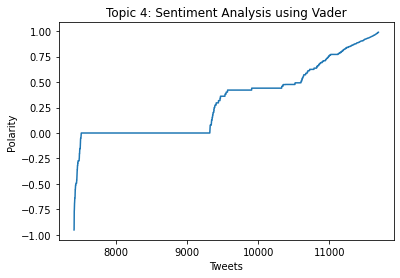

In [138]:
plt.plot(df.index, df['compound'].sort_values())
plt.title('Topic {}: Sentiment Analysis using Vader'.format(topic))
plt.ylabel('Polarity')
plt.xlabel('Tweets')

In [139]:
def calc_polarity(x, bound):
    if x < -0.05:
        return -1
    elif x > 0.05:
        return 1
    else:
        return 0

round_pol = lambda x: calc_polarity(x, 0.05)


In [140]:
df['compound']

7404     0.8316
7405     0.4767
7406     0.0000
7407     0.0000
7408     0.0000
          ...  
11689    0.3612
11690    0.4215
11691    0.6124
11692    0.0000
11693    0.0000
Name: compound, Length: 4289, dtype: float64

In [141]:
df['Polarity'] = df['compound'].apply(round_pol)
df

,tweet_index,created_at,maxtopic,corpus,cleaned_tweet,date,time,neg,neu,pos,compound,Polarity
7404,21493,2021-05-26 03:08:21,4,@Smart_NFT_News @hodooicom Such a perfect pick...,such a perfect pick for your marketing gold st...,2021-05-26,03:08:21,0.0,0.658,0.342,0.8316,1
7405,11565,2021-05-28 16:27:24,4,“I am participating in @https://twitter.com/nf...,i am participating in twitter com nftgateio ai...,2021-05-28,16:27:24,0.0,0.807,0.193,0.4767,1
7406,27952,2021-05-24 17:24:29,4,"@ArtiFi_NFT_ ""Road to Nowhere"" \n\nLoop animat...",road to nowhere loop animation with loop sound...,2021-05-24,17:24:29,0.0,1.000,0.000,0.0000,0
7407,21397,2021-05-26 03:49:04,4,I am participating in @nftgateio airdrop\n\n@R...,i am participating in airdrop,2021-05-26,03:49:04,0.0,1.000,0.000,0.0000,0
7408,21488,2021-05-26 03:11:09,4,“I am participating in @https://twitter.com/nf...,i am participating in twitter com nftgateio ai...,2021-05-26,03:11:09,0.0,1.000,0.000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11689,1967,2021-05-31 12:05:29,4,@martinraskovsky @hicetnunc2000 @bernizeck @by...,thank you,2021-05-31,12:05:29,0.0,0.286,0.714,0.3612,1
11690,8885,2021-05-29 14:04:12,4,I am participating in @https://twitter.com/nft...,i am participating in twitter com nftgateio ai...,2021-05-29,14:04:12,0.0,0.763,0.237,0.4215,1
11691,1865,2021-05-31 12:38:41,4,@savanikalui4466 @Michell50189464 @anchaohanh1...,nice airdrop join airdrop with me,2021-05-31,12:38:41,0.0,0.444,0.556,0.6124,1
11692,1847,2021-05-31 12:42:45,4,Follow this project!!\n@Quangnguyen9999 @thanh...,follow this project,2021-05-31,12:42:45,0.0,1.000,0.000,0.0000,0


# Plot Results

Text(0.5, 0, 'Tweets')

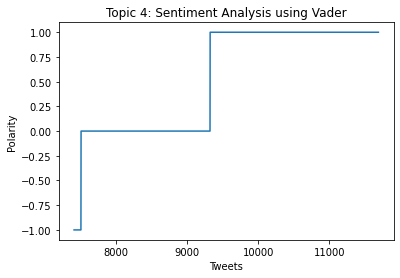

In [142]:
plt.plot(df.index, df['Polarity'].sort_values())
plt.title('Topic {}: Sentiment Analysis using Vader'.format(topic))
plt.ylabel('Polarity')
plt.xlabel('Tweets')

In [143]:
sentiments = df.groupby('Polarity').count()
sentiments

,tweet_index,created_at,maxtopic,corpus,cleaned_tweet,date,time,neg,neu,pos,compound
Polarity,,,,,,,,,,,
-1,98,98,98,98,98,98,98,98,98,98,98
0,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818
1,2373,2373,2373,2373,2373,2373,2373,2373,2373,2373,2373


Text(0, 0.5, 'Count')

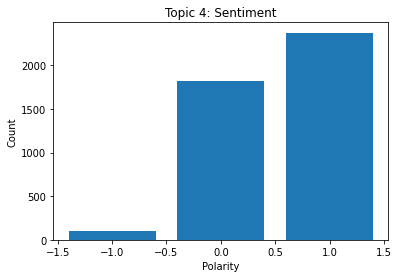

In [144]:
plt.bar(sentiments.index, sentiments["compound"])
plt.title('Topic {}: Sentiment'.format(topic))
plt.xlabel('Polarity')
plt.ylabel('Count')

In [145]:
#group tweets by date
dates = df.groupby('date').count()
dates

,tweet_index,created_at,maxtopic,corpus,cleaned_tweet,time,neg,neu,pos,compound,Polarity
date,,,,,,,,,,,
2021-05-23,41,41,41,41,41,41,41,41,41,41,41
2021-05-24,233,233,233,233,233,233,233,233,233,233,233
2021-05-25,654,654,654,654,654,654,654,654,654,654,654
2021-05-26,687,687,687,687,687,687,687,687,687,687,687
2021-05-27,269,269,269,269,269,269,269,269,269,269,269
2021-05-28,580,580,580,580,580,580,580,580,580,580,580
2021-05-29,463,463,463,463,463,463,463,463,463,463,463
2021-05-30,514,514,514,514,514,514,514,514,514,514,514
2021-05-31,848,848,848,848,848,848,848,848,848,848,848


In [146]:
dates.index

Index([2021-05-23, 2021-05-24, 2021-05-25, 2021-05-26, 2021-05-27, 2021-05-28,
       2021-05-29, 2021-05-30, 2021-05-31],
      dtype='object', name='date')

In [147]:
dates['day'] = ''
for i in range(0, len(dates.index)):
    dates['day'][i] = dates.index[i].day
dates

<ipython-input-147-3887fc99946e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['day'][i] = dates.index[i].day


,tweet_index,created_at,maxtopic,corpus,cleaned_tweet,time,neg,neu,pos,compound,Polarity,day
date,,,,,,,,,,,,
2021-05-23,41,41,41,41,41,41,41,41,41,41,41,23
2021-05-24,233,233,233,233,233,233,233,233,233,233,233,24
2021-05-25,654,654,654,654,654,654,654,654,654,654,654,25
2021-05-26,687,687,687,687,687,687,687,687,687,687,687,26
2021-05-27,269,269,269,269,269,269,269,269,269,269,269,27
2021-05-28,580,580,580,580,580,580,580,580,580,580,580,28
2021-05-29,463,463,463,463,463,463,463,463,463,463,463,29
2021-05-30,514,514,514,514,514,514,514,514,514,514,514,30
2021-05-31,848,848,848,848,848,848,848,848,848,848,848,31


Text(0, 0.5, 'Count of Topic4 Tweets')

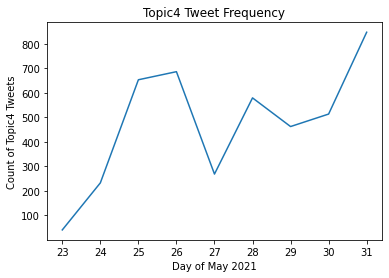

In [149]:
#plot tweet frequency over time
plt.plot(dates['day'], dates['cleaned_tweet'])
plt.title('Topic4 Tweet Frequency')
plt.xlabel('Day of May 2021')
plt.ylabel('Count of Topic4 Tweets')

In [151]:
df

,tweet_index,created_at,maxtopic,corpus,cleaned_tweet,date,time,neg,neu,pos,compound,Polarity
7404,21493,2021-05-26 03:08:21,4,@Smart_NFT_News @hodooicom Such a perfect pick...,such a perfect pick for your marketing gold st...,2021-05-26,03:08:21,0.0,0.658,0.342,0.8316,1
7405,11565,2021-05-28 16:27:24,4,“I am participating in @https://twitter.com/nf...,i am participating in twitter com nftgateio ai...,2021-05-28,16:27:24,0.0,0.807,0.193,0.4767,1
7406,27952,2021-05-24 17:24:29,4,"@ArtiFi_NFT_ ""Road to Nowhere"" \n\nLoop animat...",road to nowhere loop animation with loop sound...,2021-05-24,17:24:29,0.0,1.000,0.000,0.0000,0
7407,21397,2021-05-26 03:49:04,4,I am participating in @nftgateio airdrop\n\n@R...,i am participating in airdrop,2021-05-26,03:49:04,0.0,1.000,0.000,0.0000,0
7408,21488,2021-05-26 03:11:09,4,“I am participating in @https://twitter.com/nf...,i am participating in twitter com nftgateio ai...,2021-05-26,03:11:09,0.0,1.000,0.000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11689,1967,2021-05-31 12:05:29,4,@martinraskovsky @hicetnunc2000 @bernizeck @by...,thank you,2021-05-31,12:05:29,0.0,0.286,0.714,0.3612,1
11690,8885,2021-05-29 14:04:12,4,I am participating in @https://twitter.com/nft...,i am participating in twitter com nftgateio ai...,2021-05-29,14:04:12,0.0,0.763,0.237,0.4215,1
11691,1865,2021-05-31 12:38:41,4,@savanikalui4466 @Michell50189464 @anchaohanh1...,nice airdrop join airdrop with me,2021-05-31,12:38:41,0.0,0.444,0.556,0.6124,1
11692,1847,2021-05-31 12:42:45,4,Follow this project!!\n@Quangnguyen9999 @thanh...,follow this project,2021-05-31,12:42:45,0.0,1.000,0.000,0.0000,0


In [180]:
df['date'].iloc[4287] == df['date'].iloc[4288]

True

In [181]:
df['compound'].iloc[0]

0.8316

In [173]:
len(df.index)

4289

In [186]:
sumsentiment = 0
count = 0
for i in range(len(df.index)):
    if df['date'].iloc[i] == df['date'].iloc[0]:
        sumsentiment += df['compound'].iloc[i]
        count += 1
avg = sumsentiment / count
# print(df['date'].iloc[0])
avg

0.3440324599708889

In [187]:
#calculate average sentiment per day
#https://stackoverflow.com/questions/67899247/compute-column-average-based-on-conditions-pandas
df_avg = df.groupby(['date'], as_index=False)['compound'].mean()
df_avg

,date,compound
0,2021-05-23,0.343083
1,2021-05-24,0.351524
2,2021-05-25,0.388533
3,2021-05-26,0.344032
4,2021-05-27,0.369923
5,2021-05-28,0.279810
6,2021-05-29,0.250301
7,2021-05-30,0.259412
8,2021-05-31,0.299849


<ipython-input-189-8dbd596dc9c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avg['day'][i] = df_avg['date'][i].day


Text(0.5, 0, 'Day of May 2021')

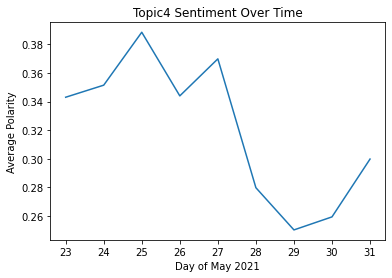

In [189]:
#add day from date as separate column
df_avg['day'] = ''
for i in range(0, len(df_avg.index)):
    df_avg['day'][i] = df_avg['date'][i].day

#plot average sentiment over time
plt.plot(df_avg['day'], df_avg['compound'])
plt.title('Topic4 Sentiment Over Time')
plt.ylabel('Average Polarity')
plt.xlabel('Day of May 2021')